In [ ]:
## Linear Regression:
# This is based on the medium post by Animesh Agarwal. This notebook will look at house prices in California as opposed to the Boston in the medium post.

In [1]:
# Import the necessary packages:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [7]:
# Import the data from the scikit-learn library:
from sklearn.datasets import fetch_california_housing
cali_housing = fetch_california_housing()

In [8]:
# If we print the values for 'cali_housing', we can find out what the dataset contains.

print(cali_housing.keys())

# The output will provide the following:
    # data: contains the information for various houses
    # target: prices of the house
    # feature_names: names of the features
    # DESCR: describes the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [9]:
# Let's find out more about the features in the dataset:

cali_housing.DESCR

# This will provide the following output:

# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [15]:
# Let's load in the this data into a Pandas dataframe and then let's print out the first 5 rows:

cali = pd.DataFrame(cali_housing.data, columns=cali_housing.feature_names)
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
cali['MEDV'] = cali_housing.target

Data pre-processing

In [17]:
# The following is

cali.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

/var/folders/l2/mjpjzmpx73s0gywh0bx1bfk00000gn/T/ipykernel_7921/3820881494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cali['MEDV'], bins=30)


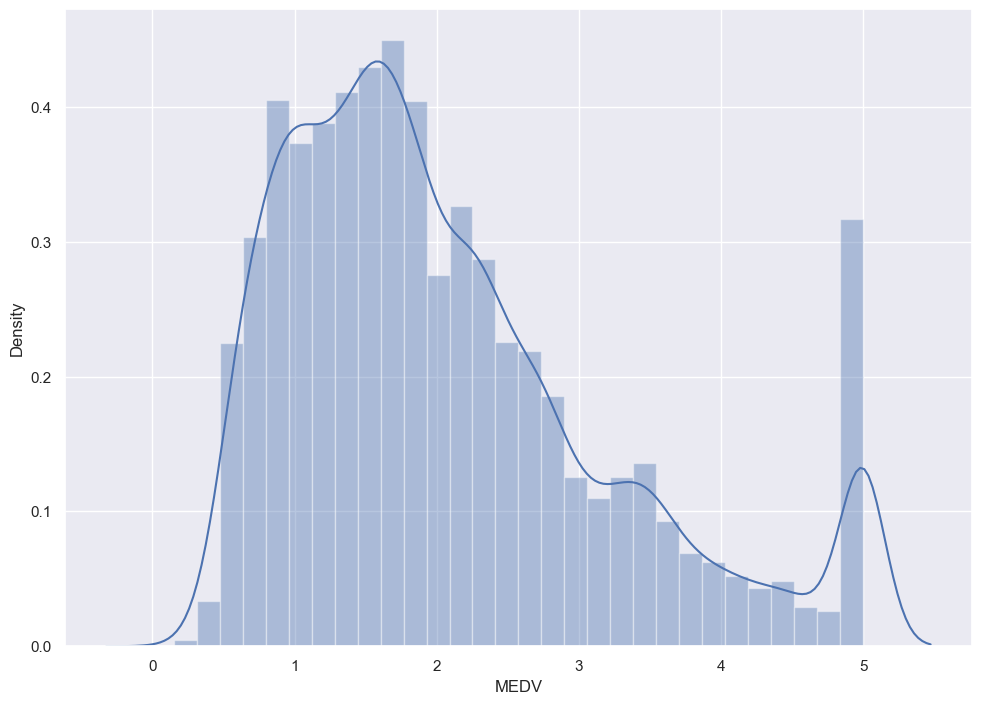

In [21]:
# Exploratory Data Analysis now happens! Let's visualise the data before we train the data.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(cali['MEDV'], bins=30)
plt.show()

<Axes: >

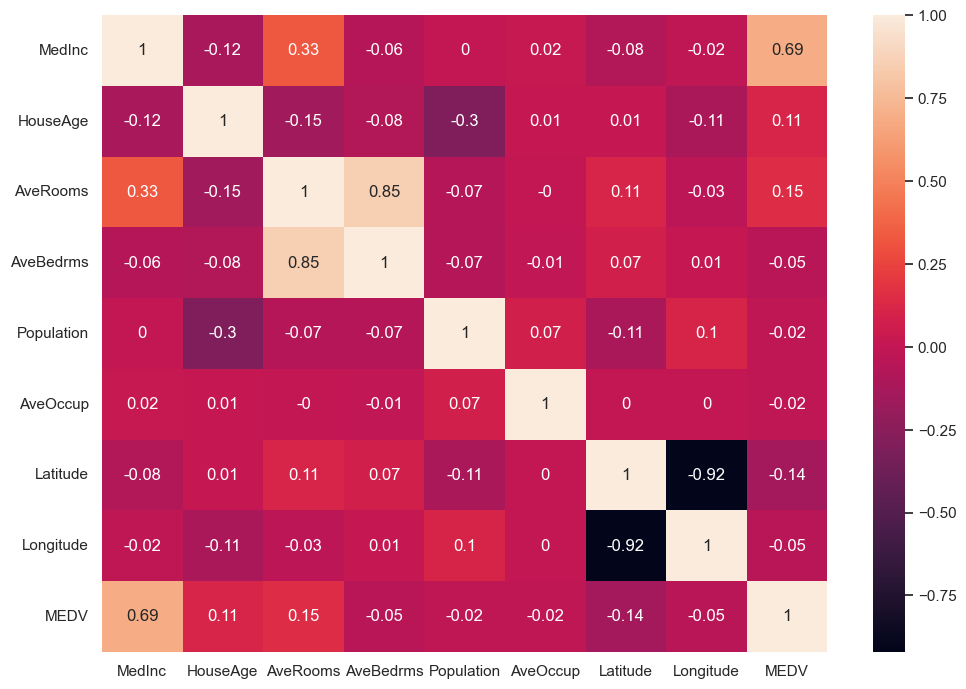

In [20]:
# Now the correlation matrix is needed to be created! This will help us measure the linear relationships between variables. We use the 'cor' function from pandas and use a heatmap to visualise it. If the value is close to -1 = negative correlation and close to 1 = positive correlation

correlation_matrix = cali.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

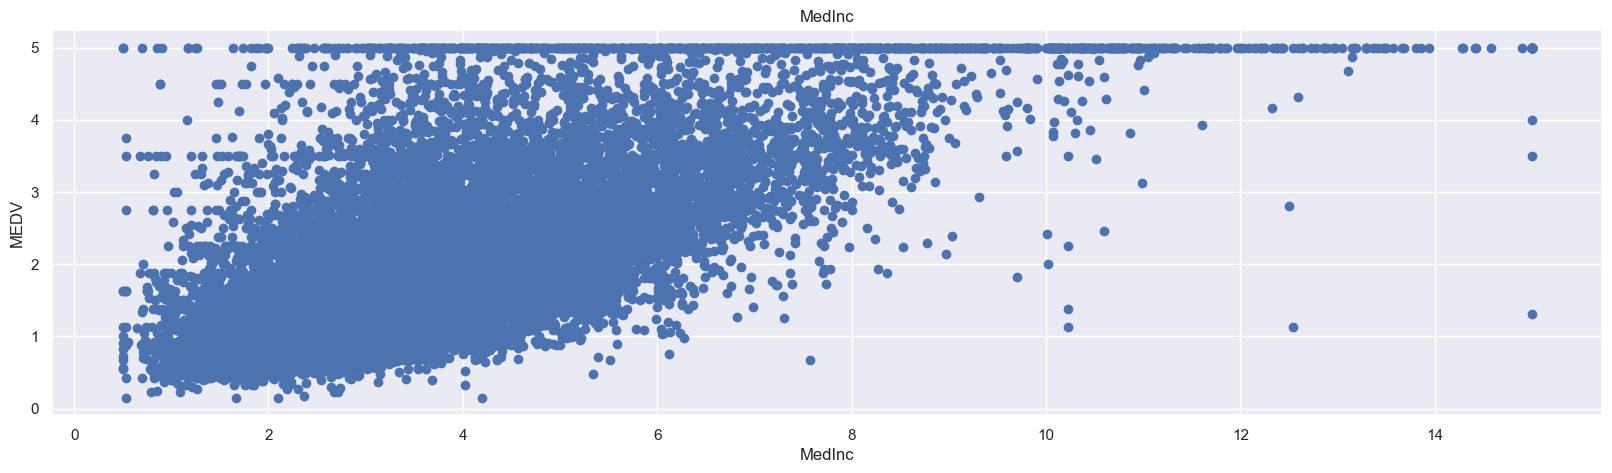

In [25]:
# Things to note:
# 1. To fit the linear regression model, we select features with high correlation with MEDV (our target variable). From the heatmap, we can see MedInc as the highest correlator, with latitude as a negative correlator.
# 2. The other thing we need to keep an eye out for is multi-colinerarity. For us, average bedrooms and average rooms have a correlation of 0.85 and negative correlation for longitude and latitude. Based on this, we will use these as correlators.

plt.figure(figsize=(20, 5))

features = ['MedInc']
target = cali['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = cali[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [26]:
# Prepare the training dataset!

X = pd.DataFrame(np.c_[cali['MedInc']], columns = ['MedInc'])
Y = cali['MEDV']

In [27]:
# Split into the training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 1)
(4128, 1)
(16512,)
(4128,)


In [34]:
# Train our models!!!!!!

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [35]:
# Test our model!
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for the training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for the testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.8359223196455023
R2 score is 0.4703942846392545


The model performance for testing set
--------------------------------------
RMSE is 0.8430087153316839
R2 score is 0.48490837623606453
